# CMSE 802 In-class assignment: Artificial Neutral Networks
## Date: 11/08/2018
## Due: 11/08/2018; 10:30 PM

### The goal of this assignment is to learn about general gradient descent.

---
### Your name: Boyao Zhu

---
### 1. The Universal Approximation Theorem

As a group, please discuss how (if at all) the theorem below relates to the topic at hand.


> In the mathematical theory of artificial neural networks, the universal approximation theorem states that a feed-forward network with a single hidden layer containing a finite number of neurons (i.e., a multilayer perceptron), can approximate continuous functions on compact subsets of $R^n$, under mild assumptions on the activation function. The theorem thus states that simple neural networks can represent a wide variety of interesting functions when given appropriate parameters; however, it does not touch upon the algorithmic learnability of those parameters.

>One of the first versions of the theorem was proved by George Cybenko in 1989 for sigmoid activation functions.

>Kurt Hornik showed in 1991 that it is not the specific choice of the activation function, but rather the multilayer feedforward architecture itself which gives neural networks the potential of being universal approximators.
<p style="text-align: right;">From: Wikipidia - https://en.wikipedia.org/wiki/Universal_approximation_theorem</p>

### Some Math
Let $\varphi(\cdot)$ be a nonconstant, bounded, and monotonically-increasing continuous function. Let $I_m$ denote the $m$-dimensional unit hypercube $[0,1]^m$. The space of continuous functions on $I_m$ is denoted by $C(I_m)$. Then, given any function $f\in C(I_m)$ and $\epsilon>0$, there exists an integer $N$, real constants $v_i, b_i \in \mathbb{R}$ and real vectors $\mathbf{w}_i \in \mathbb{R}^m$, where $i = 1, \ldots, N$ such that if we define: 
$$F(\mathbf{x}) = \sum_{i=1}^N v_i \cdot\varphi \big(\langle\mathbf{w}_i , \mathbf{x}\rangle + b_i\big) $$
then 
$$|F(\mathbf{x}) - f(\mathbf{x})| < \epsilon $$

for all $x\in I_m$. In other words, functions of the form $F(\mathbf{x})$ are dense in $C(I_m)$.

**Question 1**: In simplest terms, why do we care about the Universal Approximation Theorem?

**Your Answer: ** In the mathematical theory of artificial neural networks, the universal approximation theorem states[1] that a feed-forward network with a single hidden layer containing a finite number of neurons can approximate continuous functions on compact subsets of Rn, under mild assumptions on the activation function. The theorem thus states that simple neural networks can represent a wide variety of interesting functions when given appropriate parameters; however, it does not touch upon the algorithmic learnability of those parameters.

----
### 2. Guessing a functions parameters
Imagine we want to train a deep neural network with several hidden layers. So, we have a big array of weights $W$ (for all the synapses and all the layers), several biases $b$ and training data $\big\{(x_l , y_l) :  l=1,\ldots, L \big\}$. For each choice of weights and biases,  forward propagation produces an estimate $\hat{y}(x_l)$ of $y_l$ for each training data point $x_l$. (This is what we did in the pre-class assignment).

Before we solve the ANN problem let's use a simpler model:

Suppose we have the experimental data (```x_data``` and ```y_data```) given below, and that we want to fit a linear model $y =  w\cdot x + b$ to this data.  How to we find $w$ and $b$? 

First, let's just try to guess different values for $w$ and $b$ that best fit the data.

In [1]:
## experimental data
import numpy as np
x_data = np.array([1, 2, 2.5, 3, 3.5, 4.5, 4.7, 5.2, 6.1, 6.1, 6.8])
y_data = np.array([1.5, 1, 2, 2, 3.7, 3, 5, 4, 5.8, 5, 5.7])

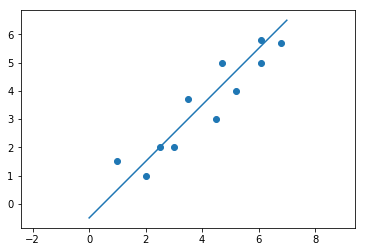

In [31]:
import matplotlib.pylab as plt

w = 1
b = -0.5

plt.scatter(x_data,y_data)
x_range = np.array([i for i in range(0, 8)])
y_range = w*x_range + b
plt.plot(x_range,y_range)
plt.axis('equal')
plt.show()



**Question 2**: What values did you find for $w$ and $b$ and how do you know your selection of $b$ and $w$ are the best?

In [32]:
w = 1
b = -0.5

**Your answer: ** I got this values by guessing and check the plot above

----
### 3. Mean Squared Error

We can use the Mean Squared Error (MSE) to measure how good our choice is for $b$ and $w$. The general $MSE$ equation is as follows: 

$$MSE(W,b)  = \frac{1}{L} \sum_{i=1}^L (y_i - \hat{y}(x_l))^2$$

If we plug in our linear funciton $\hat{y} = w\cdot x + b$ we get:

$$MSE(W,b)  = \frac{1}{L} \sum_{i=1}^L ( y_i - (w\cdot x_i + b))^2$$

One strategy is to find values of $w$ and $b$ which minimize this expression. Keep in mind that $MSE$ is a function of more than one variable, with a sum over potentially many training data points. 

** Write a function (called MSE) that takes the guesses for $b$, $w$ and the experimental data ```x_data``` and ```y_data``` as inputs and returns the $MSE$ for the function $y = w\cdot x + b$. **

In [33]:
# Your code:

def MSE(b,w,x_data, y_data):
    
    Mean_sq_error = 0
    L = len(x_data)
    for i in range(L):
        Mean_sq_error += (y_data[i]-(w*x_data[i]+b))**2

    Mean_sq_error = Mean_sq_error/L
    
    return Mean_sq_error


Test to make sure your funciton works.

In [34]:
error = MSE(b, w, x_data, y_data)
print(error)

0.44363636363636355


----
### 4. Example of Gradient Descent
>Gradient descent is an algorithm that minimizes functions. Given a function defined by a set of parameters, gradient descent starts with an initial set of parameter values and iteratively moves toward a set of parameter values that minimize the function. This iterative minimization is achieved using calculus, taking steps in the negative direction of the function gradient.
<p style="text-align: right;">from: https://spin.atomicobject.com/2014/06/24/gradient-descent-linear-regression/</p>

<img src = https://goo.gl/4pPlEP>

** Review the gradient decent code below and answer the questions that follow: **

In [35]:
# function for plotting

import matplotlib.pylab as plt

from IPython.display import display, clear_output
import time

def show_animation(delay=0.01):
    fig = plt.gcf()
    time.sleep(delay)       # Sleep for a short period to slow down the animation
    clear_output(wait=True) # Clear output for dynamic display
    display(fig)            # Reset display
    fig.clear()             # Prevent overlapping and layered plots

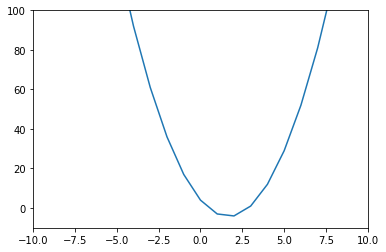

In [36]:
# Define the function (parabola)
def f1(x):
    return 3*x**2 - 10*x + 4

# Derivative of F1 (also called the gradient)
def grad_f1(x):
    return 6*x - 10

# Choose the x points
x = np.array([i for i in range(-1000, 1000)])

#Plot the funciton
plt.plot(x, f1(x))
plt.ylim(-10,100)
plt.xlim(-10,10)
plt.show()

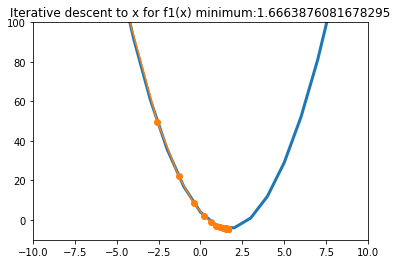

Local min of function is 1.666471
Number of iterations: 30


<Figure size 432x288 with 0 Axes>

In [37]:
# Gradient Descent

x0 = -7                                  # starting point for gradient descent
eta = 0.05                             # step size (a.k.a learning rate)
p = .0001                              # chosen precision
maxIter = 50                             # maximum number of iterations

former_min = x0
iterative_mins = [former_min]
iterCounter = 1

while True:
    new_min = former_min - eta * grad_f1(former_min)
    
    iterative_mins.append(new_min)
    if abs(former_min - new_min) <= p:
        print('Local min of function is %f' %new_min)
        print('Number of iterations: %d' %iterCounter)
        break
    else:
        former_min = new_min
        
    if iterCounter == maxIter:
        print('Local min not reached')
        break
    else:
        iterCounter += 1       

    plt.figure(0)
    plt.plot(x, f1(x), lw=3)
    plt.ylim(-10,100)
    plt.xlim(-10,10)
    plt.title('Iterative descent to x for f1(x) minimum:'+str(new_min))
    
    plt.plot(iterative_mins, f1(np.array(iterative_mins)), marker='o')
    show_animation(0.5)

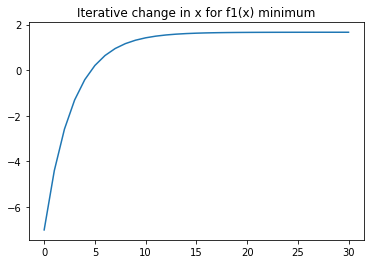

In [38]:
plt.plot(iterative_mins)
plt.title("Iterative change in x for f1(x) minimum")
plt.show()

**Question 3**: This code uses an infinite ```while``` loop.  Two different conditions break this loop and ensures that the loop will not run forever. What are those conditions?

**Your answer: ** iteration and precision

**Question 4**: Please describe how the process depends on the learning rate (```eta``` or $η$) parameter (i.e. what happens if too small or too large). 

**Your answer: ** if eta is small, the learning process is small. if eta is large, the learning process will not converge, probably oscillate back and forth I guess

**Question 5**: After the minimum is computed, why is the word "**local**" used?

**Your answer: ** Even though we got the minimum as shown, it does not guarantte it is a global minimum.

**Question 6**: Explain the logic behind the minimization algorithm above. 

**Your answer: **
Gradient descent is a first-order iterative optimization algorithm for finding the minimum of a function. To find a local minimum of a function using gradient descent, one takes steps proportional to the negative of the gradient (or approximate gradient) of the function at the current point.


----
### 5. Multi-variable Linear Regression

### More Math

** Math fact:** If $J : \mathbb{R}^m \longrightarrow \mathbb{R}$ is a real-valued function of $m$ variables $\theta_1 ,\ldots, \theta_m$, then **minus** its gradient 

$$-\nabla J = -\left[\begin{matrix} \frac{\partial }{\partial \theta_1} \\ \vdots \\ \frac{\partial}{\partial \theta_m}\end{matrix}\right] $$

indicates the direction of **steepest descent** at $\theta$. That is, starting at $\theta$, the direction along which the function $J$ decreases the fastest. The gradient descent method attemps to find a local minimum of $J$ by first fixing a learning rate $\eta > 0$, an initial point $\theta^0 \in \mathbb{R}^m$, and producing a sequence of points

$$\theta^{n+1} = \theta^n - \eta \cdot \nabla J(\theta^n) \;\;\; , \;\;\;\; n=0,1,\ldots $$

which, under favorable conditions, converge to a **local** minimizer for $J$.


### Gradient Calculation for the above linear fit problem:
$$MSE(W,b)=\frac{1}{L} \sum_{i=1}^L (y_i - (w \cdot x_i + b))^2$$

** The partial derivatives of MSE with respect to $w$ and $b$ are: **


$$\frac{\partial}{\partial w} MSE =  \frac{2}{L} \sum_{i=1}^{L}-x_i(y_i-(wx_i+b))  $$

$$\frac{\partial}{\partial b} MSE =  \frac{2}{L} \sum_{i=1}^{L}-(y_i-(wx_i+b))  $$

The negative Gradient is:

$$-\nabla MSE = -\left[\begin{matrix} \frac{\partial}{\partial w} \\ \frac{\partial}{\partial b}\end{matrix}\right] MSE ,$$


** thus, estimating the next value based on the current can be calculated by: **

$$w^{n+1} = w^n - \eta \cdot \frac{2}{L} \sum_{i=1}^{L}-x_i(y_i-(wx_i+b)) $$ 

$$b^{n+1} = b^n - \eta \cdot \frac{2}{L} \sum_{i=1}^{L}-(y_i-(wx_i+b)) $$

** Complete the code in the cell below for calculating gradietns. **

In [61]:
def gradient(b_current, w_current, x, y):
    # Your code:
    L = len(x)
    b_gradient = 0
    w_gradient = 0
    for i in range(L):
        w_gradient = w_gradient - x[i]*(y[i]-(w_current*x[i]+b_current))
        b_gradient = b_gradient - (y[i]-(w_current*x[i]+b_current))
    w_gradient = w_gradient *2 / L
    b_gradient = b_gradient *2 / L
    
    return [b_gradient, w_gradient]

Calculate the gradient components using the ```Gradiant``` function:

In [62]:
[b_gradient, w_gradient] = gradient(b, w, x_data, y_data) 

print(b_gradient)
print(w_gradient)

-7.163636363636363
-38.24727272727272


The following uses the $\eta = 0.001$, ```b_gradient``` and ```w_gradient``` to  cacluate a new estimation for the best $b$ and $w$:

In [63]:
eta = 0.001                             # step size (a.k.a learning rate)
new_b = b - (eta * b_gradient)
new_w = w - (eta * w_gradient)

print(b, w)
print(b_gradient, w_gradient)
print(new_b, new_w)

2 -0.5
-7.163636363636363 -38.24727272727272
2.0071636363636363 -0.46175272727272726


** (1) Base on the 1D gradient descent code given earlier, implement a two-variable gradient descent code to find the b and w for minimal MSE. **

** (2) Record the evolution of values of MSE, b, and w during iteration. **

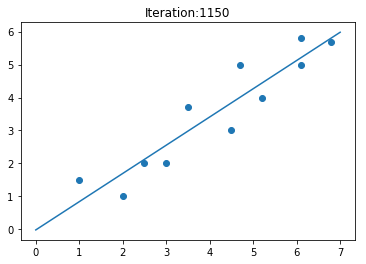

Local min of function for b is -0.020881
Local min of function for w is 0.857542
Number of iterations: 1185


<Figure size 432x288 with 0 Axes>

In [65]:
# parameters

w = -0.5
b = 2

p = 0.00001                                
maxIter = 3000                            
eta = 0.02

MSE_evl = []
b_evl = []
w_evl = []


former_b = b
former_w = w
iterative_mins_b = [former_b]
iterative_mins_w = [former_w]

iterCounter = 1
#[b_gradient, w_gradient] = gradient(former_b,former_w,x_data,y_data)
while True:
    # Your code:
    [b_gradient, w_gradient] = gradient(former_b,former_w,x_data,y_data)
    new_b = former_b - (eta * b_gradient)
    new_w = former_w - (eta * w_gradient)
    
    iterative_mins_b.append(new_b)
    iterative_mins_w.append(new_w)
    
    if abs(former_b - new_b) <= p and abs(former_w - new_w) <= p:
        print('Local min of function for b is %f' %new_b)
        print('Local min of function for w is %f' %new_w)
        print('Number of iterations: %d' %iterCounter)
        break
    else:
        former_b = new_b
        former_w = new_w
        
    if iterCounter == maxIter:
        print('Local min not reached')
        break
    else:
        iterCounter += 1    
    
    b_evl.append(new_b)
    w_evl.append(new_w)
    error = MSE(new_b,new_w,x_data, y_data)
    MSE_evl.append(error)
    
    # plotting    
    if iterCounter%50 == 0:
        plt.scatter(x_data,y_data)
        x_range = np.array([i for i in range(0, 8)])
        y_range = new_w*x_range + new_b
        plt.plot(x_range,y_range)
        plt.title('Iteration:'+str(iterCounter))
        show_animation()

**Plot the evolution of MSE, b, and w. **

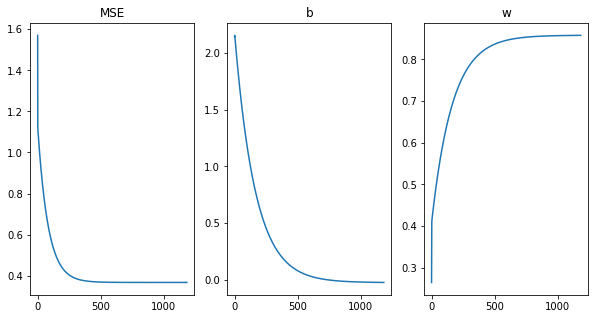

In [67]:
plt.figure(figsize = (10,5))
plt.subplot(1,3,1)
plt.plot(MSE_evl)
plt.title('MSE')

plt.subplot(1,3,2)
plt.plot(b_evl)
plt.title('b')

plt.subplot(1,3,3)
plt.plot(w_evl)
plt.title('w')

plt.show()

**Question 7:** Did you see the evolution of MSE, b and w slowing down over time? Can you think of a reason why the descending becomes sluggish?

**Your answer: **
Yes, 

because when the step approaches to local minimum, gradient will be very small, which makes the move slowly.  that is why it is sluggish

### Congratulations, we're done!

** Don't forget to add your names to the top!!**

Log into the course D2L website (d2l.msu.edu) and go to "Assessments > Assignments > In-class Assignment 20181108".